In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from enum import Enum
from pathlib import Path
from scipy.interpolate import CubicSpline
from skimage.morphology import skeletonize
import json
import requests 
import io
import base64
from os.path import splitext, isfile, join

In [146]:
def load_image(filename):
    return Image.open(filename)

def convertToCategoricalMasks(mask, viewe):
    unique_values = np.unique(mask)
    if viewe == 'axial' and len(unique_values) == 6 : # composit image class
        # print("HHHHHHHHHHHHHHHHHHHH")
        mask[mask==unique_values[0]] = unique_values[-1] #merging the background with unregistered class
        unique_values = np.unique(mask)

    for i in range(len(unique_values)):
        mask[mask == unique_values[i]] = i
    return mask

### Axial

In [176]:
idx = 501

# Navigate four directories back
images_dir = r"C:\Users\USER\Desktop\Saied\Spinal_stenosis\Datasets\Ground_Truth_Label\04_Intermediary_Ground_Truth_Data\T1_Output"
masks_dir = r"C:\Users\USER\Desktop\Saied\Spinal_stenosis\Datasets\Ground_Truth_Label\04_Intermediary_Ground_Truth_Data\Label_Images"

images_list = [os.path.join(images_dir, img_name)  for img_name in os.listdir(images_dir)]
masks_list = [os.path.join(masks_dir, mask_name)  for mask_name in os.listdir(masks_dir)]
image_name_path =images_list[idx]
mask_name_path =masks_list[idx]
print(image_name_path)
print(mask_name_path)

C:\Users\USER\Desktop\Saied\Spinal_stenosis\Datasets\Ground_Truth_Label\04_Intermediary_Ground_Truth_Data\T1_Output\T1_0184_D3.png
C:\Users\USER\Desktop\Saied\Spinal_stenosis\Datasets\Ground_Truth_Label\04_Intermediary_Ground_Truth_Data\Label_Images\L1_0184_D3.png


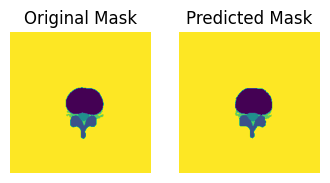

In [178]:
VIEW = "axial"
url = f"http://127.0.0.1:8000/model_inference_{VIEW}/"

files = {
    "image_file": open(image_name_path, "rb"), 
}
response = requests.post(url,  files=files)
response_data = response.json()

# Decode Base64 image
mask_base64 = response_data["pred_mask"]
mask_bytes = base64.b64decode(mask_base64)
mask_array = np.frombuffer(mask_bytes, dtype=np.uint8)
mask_pred = cv2.imdecode(mask_array, cv2.IMREAD_GRAYSCALE)

# Create a subplot with two axes (side by side)
fig, axes = plt.subplots(1, 2, figsize=(4, 4))
true_mask =load_image(mask_name_path)
mask = np.asanyarray(true_mask).copy()
# Display the original mask on the first axis
mask_arr = convertToCategoricalMasks(mask, VIEW)
# print
axes[0].imshow(mask_arr)
axes[0].set_title("Original Mask")  # Set the title for the mask
axes[0].axis('off')  # Optionally turn off axis labels

# Display the predicted mask on the second axis
axes[1].imshow(mask_pred)
axes[1].set_title("Predicted Mask")  # Set the title for the predicted mask
axes[1].axis('off')  # Optionally turn off axis labels

# Show the plot
plt.show()

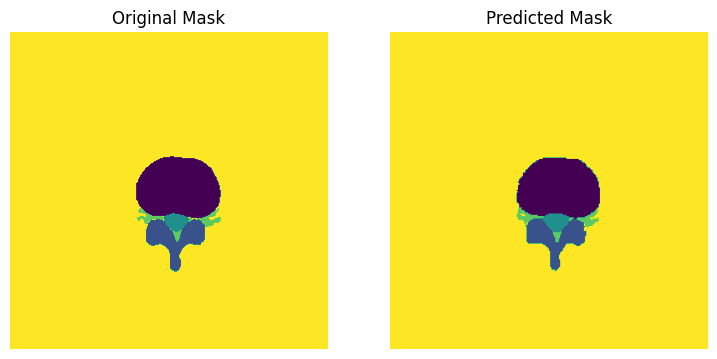

In [179]:
# Create a subplot with two axes (side by side)
fig, axes = plt.subplots(1, 2, figsize=(9, 9))
axes[0].imshow(mask_arr)
axes[0].set_title("Original Mask")  # Set the title for the mask
axes[0].axis('off')  # Optionally turn off axis labels

# Display the predicted mask on the second axis
axes[1].imshow(mask_pred)
axes[1].set_title("Predicted Mask")  # Set the title for the predicted mask
axes[1].axis('off')  # Optionally turn off axis labels
plt.show()

### Sagittal

In [180]:
idx = 302
# Navigate four directories back
images_dir = r"C:\Users\USER\Desktop\Saied\Spinal_stenosis\Datasets\Lumbar spine MRI annotation with IVD height and Pfirrmann grade predictions\Input_384"
masks_dir = r"C:\Users\USER\Desktop\Saied\Spinal_stenosis\Datasets\Lumbar spine MRI annotation with IVD height and Pfirrmann grade predictions\Label_384_6SG"

images_list = [os.path.join(images_dir, img_name)  for img_name in os.listdir(images_dir)]
masks_list = [os.path.join(masks_dir, mask_name)  for mask_name in os.listdir(masks_dir)]
image_name_path =images_list[idx]
mask_name_path =masks_list[idx]
print(image_name_path)
print(mask_name_path)

C:\Users\USER\Desktop\Saied\Spinal_stenosis\Datasets\Lumbar spine MRI annotation with IVD height and Pfirrmann grade predictions\Input_384\0339_T2_TSE_SAG_384_0002_0335_008_R.png
C:\Users\USER\Desktop\Saied\Spinal_stenosis\Datasets\Lumbar spine MRI annotation with IVD height and Pfirrmann grade predictions\Label_384_6SG\0339_T2_TSE_SAG_384_0002_0335_008_R.png


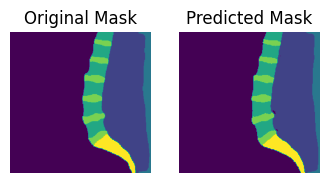

In [181]:
VIEW = "sagittal"
url = f"http://127.0.0.1:8000/model_inference_{VIEW}/"

files = {
    "image_file": open(image_name_path, "rb"), 
}
response = requests.post(url,  files=files)
response_data = response.json()

# Decode Base64 image
mask_base64 = response_data["pred_mask"]
mask_bytes = base64.b64decode(mask_base64)
mask_array = np.frombuffer(mask_bytes, dtype=np.uint8)
mask_pred = cv2.imdecode(mask_array, cv2.IMREAD_GRAYSCALE)

# Create a subplot with two axes (side by side)
fig, axes = plt.subplots(1, 2, figsize=(4, 4))
true_mask =load_image(mask_name_path)
mask = np.asanyarray(true_mask).copy()
# Display the original mask on the first axis
mask_arr = convertToCategoricalMasks(mask, VIEW)
# print
axes[0].imshow(mask_arr)
axes[0].set_title("Original Mask")  # Set the title for the mask
axes[0].axis('off')  # Optionally turn off axis labels

# Display the predicted mask on the second axis
axes[1].imshow(mask_pred)
axes[1].set_title("Predicted Mask")  # Set the title for the predicted mask
axes[1].axis('off')  # Optionally turn off axis labels

# Show the plot
plt.show()

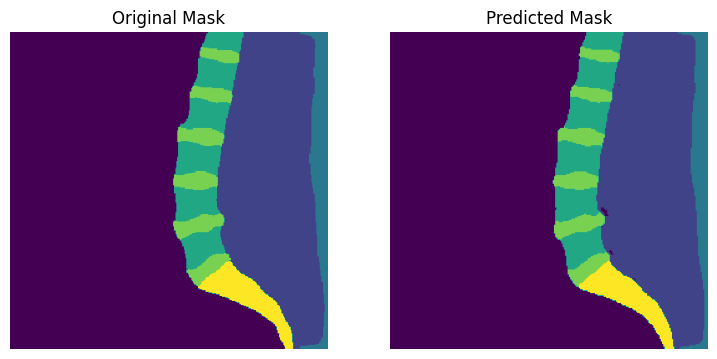

In [182]:
# Create a subplot with two axes (side by side)
fig, axes = plt.subplots(1, 2, figsize=(9, 9))
axes[0].imshow(mask_arr)
axes[0].set_title("Original Mask")  # Set the title for the mask
axes[0].axis('off')  # Optionally turn off axis labels

# Display the predicted mask on the second axis
axes[1].imshow(mask_pred)
axes[1].set_title("Predicted Mask")  # Set the title for the predicted mask
axes[1].axis('off')  # Optionally turn off axis labels
plt.show()